<font size=7>STTC Plots

In [10]:
from human_hip import spike_data

In [13]:
import numpy as np                                                    # Packages for data analysis
import matplotlib.pyplot as plt
from human_hip.spike_data import correlation_matrix, eigenvalues_eigenvectors, plot_eigenvectors #firing_rates,

In [87]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )
#sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")


In [4]:
# def plot_sttc_matrix( sd, blur=20, sttc_cutoff_high=1.1, plot_color="magma" ):
#     """
#     Outputs: plots the STTC and Correlation matrices for neurons in a recording
#     Input: 
#         sd: spike_data object, the standard data type used by braingeneers 
#         plot_color: string, the color map to use for the plots. Good colors include: "magma", "viridis", "plasma", "inferno"
#     """
#     STTC = sd.spike_time_tilings( blur )  # get the spike time tiling matrix
#     STTC = np.where(STTC<sttc_cutoff_high, STTC, STTC*0)
                      
#     # subplot of STTC 
#     plt.imshow(STTC, cmap=plot_color)       # Show the STTC matrix
#     plt.title("STTC")         # Set the title, x and y labels
#     plt.xlabel("Neuron")
#     plt.ylabel("Neuron")
#     plt.colorbar( shrink=0.3) # Add a colorbar to the plot


In [14]:
def plot_sttc_matrix( sd, blur=20, sttc_cutoff_high=1.1, plot_color="magma" ):
    """
    Outputs: plots the STTC and Correlation matrices for neurons in a recording
    Input: 
        sd: spike_data object, the standard data type used by braingeneers 
        plot_color: string, the color map to use for the plots. Good colors include: "magma", "viridis", "plasma", "inferno"
    """
    STTC = sd.spike_time_tilings( blur )  # get the spike time tiling matrix
    STTC = np.where(STTC<sttc_cutoff_high, STTC, STTC*0)
                      
    # subplot of STTC 
    plt.imshow(STTC, cmap=plot_color)       # Show the STTC matrix
    plt.title("STTC Matrix")         # Set the title, x and y labels
    plt.xlabel("Neuron")
    plt.ylabel("Neuron")
    plt.colorbar( shrink=.8) # Add a colorbar to the plot


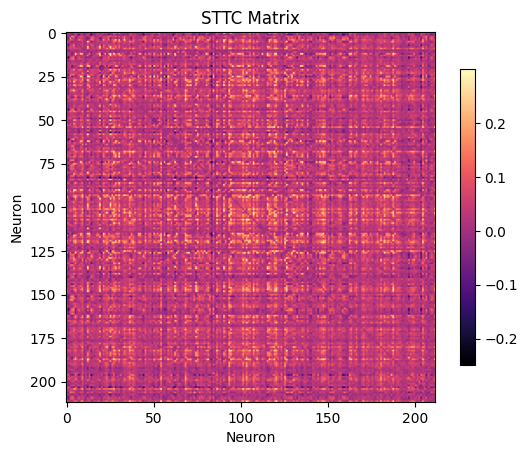

In [89]:
plot_sttc_matrix( sd, sttc_cutoff_high=0.3 )

In [8]:
def plot_eigenvectors(sd, n_eigenvectors=5 ):
    corr_matrix = correlation_matrix(sd)
    sttc_matrix = sd.spike_time_tilings()
    corr_eigenvalues, corr_eigenvectors = eigenvalues_eigenvectors(corr_matrix)
    sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
    
    #fig, axs = plt.subplots(5, 2, figsize=(12,8)) #,  )

    for i in range(n_eigenvectors):
        #if i: plt.xticks([])
        axs[i,0].stem(sttc_eigenvectors[:,i])
        axs[i,1].stem(corr_eigenvectors[:,i])
        axs[i,0].set(ylabel= f"{i+1}")
        
        ylim_min = np.min([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) -.1
        ylim_max = np.max([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) +.1
        axs[i,0].set_ylim(ylim_min, ylim_max)
        axs[i,1].set_ylim(ylim_min, ylim_max)

    #for ax in fig.get_axes():
    #    ax.label_outer()
    axs[0, 0].set_title("STTC")
    axs[0, 1].set_title("Correlation")


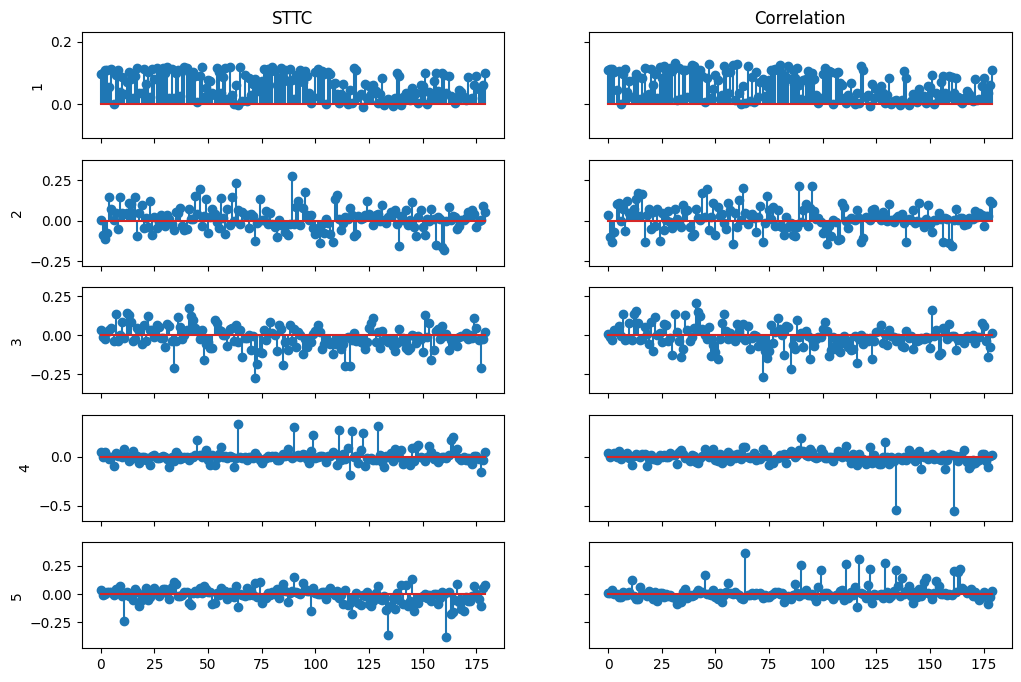

In [16]:
plot_eigenvectors(sd)

# <font color="brown"> Attempt clustering STTC Matrix

<font color="red"> This code was from chatgpt. I don't think it's right, because the resulting matrix doesn't appear to be square. 

<font color="red"> The code form the link below is also worht trying:
https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb


In [17]:
import scipy.cluster.hierarchy as sch

In [35]:
neo = sd.spike_time_tilings()
sttc_cuttoff = 0.5
neo = np.where( neo<sttc_cuttoff, neo, (neo*0)+sttc_cuttoff )

In [36]:

# Perform hierarchical clustering
d = sch.distance.pdist(neo)  # vector of pairwise distances
L = sch.linkage(d, method='complete')  # linkage matrix
ind = sch.fcluster(L, 0.5 * d.max(), 'distance')  # cluster indices

# Reorder correlation matrix
columns = [neo[i] for i in np.argsort(ind)]
neo_sorted = np.array([list(col) for col in zip(*columns)])


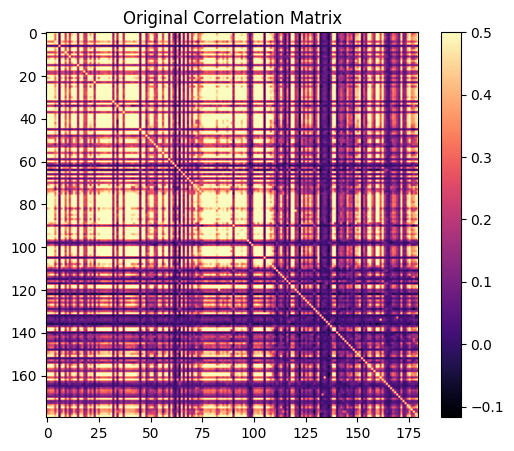

In [39]:

# Plot original correlation matrix
plt.figure(figsize=(6, 5))
plt.title('Original Correlation Matrix')
plt.imshow(neo, aspect='auto', cmap="magma" )
plt.colorbar()


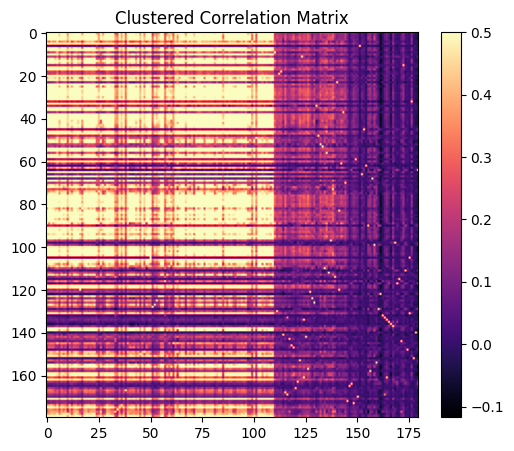

In [40]:

# Plot sorted correlation matrix
plt.figure(figsize=(6, 5))
plt.title('Clustered Correlation Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()



# <font color="brown"> Try 2 

In [106]:
neo = sd.spike_time_tilings()
sttc_cuttoff = 0.3
neo = np.where( neo<sttc_cuttoff, neo, neo*0 ) #+sttc_cuttoff )
#neo = np.where( neo<sttc_cuttoff, neo, (neo*0)+sttc_cuttoff ) #+sttc_cuttoff )

In [107]:
# Perform hierarchical clustering
# d = sch.distance.pdist(neo)  # vector of pairwise distances
# L = sch.linkage(d, method='complete')  # linkage matrix
# ind = sch.fcluster(L, 0.5 * d.max(), 'distance')  # cluster indices

d = sch.distance.pdist(neo)  # vector of pairwise distances
L = sch.linkage(d, method='complete')  # linkage matrix
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering


In [108]:
ind2 = sch.fcluster(L, 0.5 * d.max(), 'distance')
ind2

array([ 8,  1,  8,  3,  8, 10,  3,  8,  8, 10,  3,  3, 12, 10,  3,  8,  3,
        3,  8, 11,  2,  8, 10,  9,  8, 11, 10,  6, 15,  8, 15,  3,  8,  9,
        9,  9,  6, 10,  4,  9,  3,  8,  8,  3,  3, 15,  3,  8,  8,  2, 15,
        8,  8,  8,  7,  2, 10,  2, 10,  8,  9,  3, 11,  8,  9,  3,  8,  8,
        7,  8,  8,  8,  3,  8, 12, 14,  8,  9,  8,  9,  8, 14,  3,  2,  8,
        2,  6,  8,  9,  3, 13,  8,  3,  5, 14, 10,  9,  8, 10, 10,  8,  7,
        8,  4, 10, 15,  8,  7,  9, 10,  9,  3,  8,  9,  3, 11, 14, 14,  9,
        6,  7,  9,  3,  9,  3,  4, 13,  8,  8,  8,  9,  9, 10,  8,  8, 15,
        3,  2,  8,  3,  3,  3,  3,  8, 10,  8, 10, 14, 10,  3,  9,  3, 10,
        3,  3,  3, 10, 10,  3,  8,  3,  3, 10, 14,  3,  8,  9,  3,  3,  8,
       10,  8, 10,  9,  8,  8,  3,  8, 10,  9,  4,  3, 10,  8, 10,  8,  9,
        7,  8,  9,  9,  9,  2,  3,  3,  3,  1,  9,  9, 10,  3,  3,  3,  1,
       14,  3,  8,  2,  3,  8,  3, 14], dtype=int32)

In [111]:
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering

# Reorder correlation matrix
neo_sorted = neo[ind, :][:, ind]


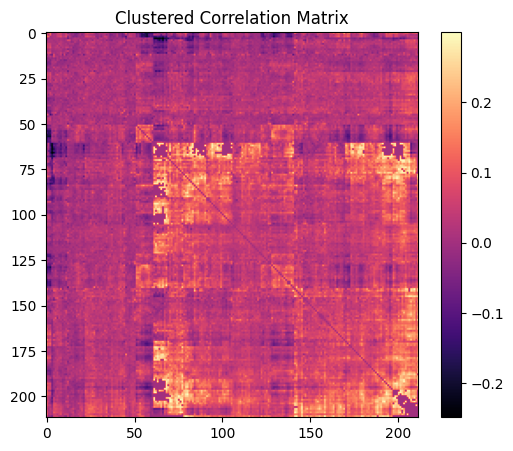

In [110]:
# Plot sorted correlation matrix
plt.figure(figsize=(6, 5))
plt.title('Clustered Correlation Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()


In [115]:
ind[60:140]

array([161,  12,  74,  19,  62, 115,  25,  90, 126, 116, 147,  75, 117,
        81, 204, 163, 211,  94,  45, 105,  30,  28,  50, 135,   4,  21,
       138, 102,  69,  63,  71,  91,  52, 165,   8, 171, 143, 134,  42,
       145,  80,  70,  53,   0,  87, 112, 177, 106,  51, 175,  59,  48,
       169, 183,  18, 100, 174,  41,  29,  47, 185, 188,  78,   7,  97,
        32,  66,  67, 128, 159,  76, 209,  73,  15, 133,   2, 206, 127,
        24, 129], dtype=int32)

In [114]:
ind[140:]

array([ 84, 130,  33, 150,  77,  23, 179,  64,  79, 113, 191,  35, 173,
       190,  39, 118, 197, 131, 166,  34,  88,  96, 189,  60, 110, 123,
       198, 121, 108, 186,  56,  37, 144,  99,  98, 157, 184,  13,  95,
       162, 148, 172, 199, 156,  22, 178, 152,  26, 170, 146,   9,  58,
       104, 109, 182, 132,   5, 119,  27,  86,  36, 187, 120, 107, 101,
        68,  54, 125, 180, 103,  38,  93], dtype=int32)

In [ ]:
# neuron_xy = []
# for neuron in sd.neuron_data[0].values():
#     neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
# neuron_xy = np.array(neuron_xy)

# # Plot original scatter
# plt.figure(figsize=(8, 8))
# ax = plt.axes()
# ax.set_facecolor(background_color)
# if image_path is not None:
#     img = plt.imread(image_path)      # Load in image
#     plt.imshow(img,  extent=[0, 3850, 0, 2100]) 
# if plot_neuron:
#     plt.scatter( neuron_xy[:,0], neuron_xy[:,1], alpha=0.15, c='grey')
# plt.xlim( xlim )
# plt.ylim( ylim )    


In [123]:
# for neuron_ind in neuron_group:
#     print(neuron_ind)

84
130
33
150
77
23
179
64
79
113
191
35
173
190
39
118
197
131
166
34
88
96
189
60
110
123
198
121
108
186
56
37
144
99
98
157
184
13
95
162
148
172
199
156
22
178
152
26
170
146
9
58
104
109
182
132
5
119
27
86
36
187
120
107
101
68
54
125
180
103
38
93


In [132]:

neuron_group1 = ind[140:]
neuron_group2 = ind[60:140]
#ind[140:]

/tmp/ipykernel_39346/1453412861.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
/tmp/ipykernel_39346/1453412861.py:17: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
/tmp/ipykernel_39346/1453412861.py:25: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
/tmp/ipykernel_39346/1453412861.py:26: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data()

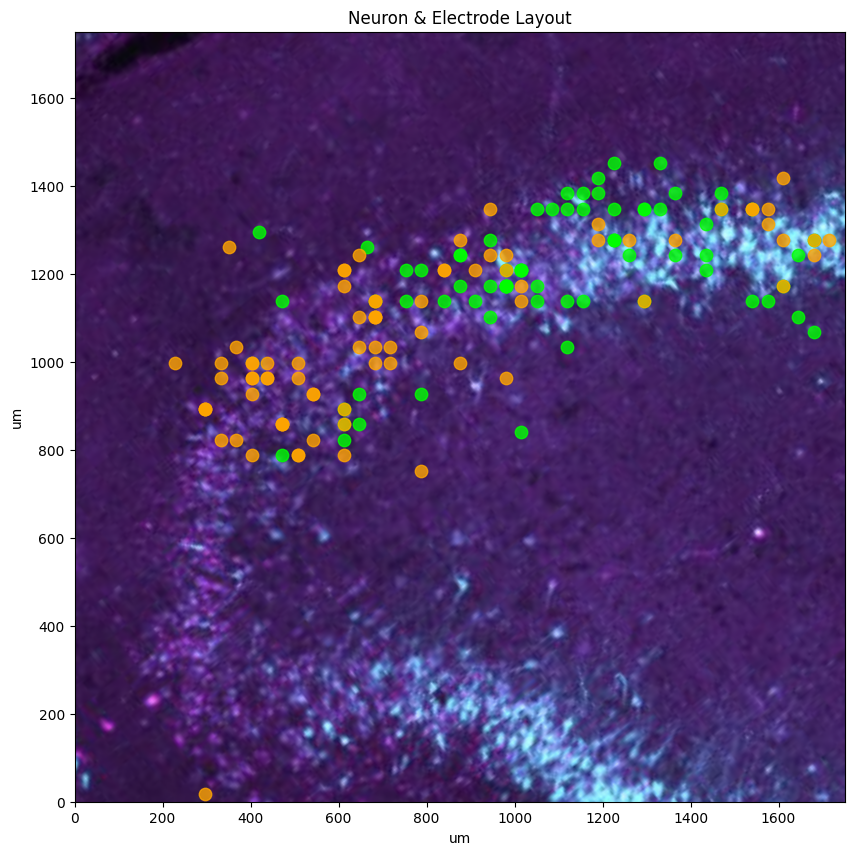

In [134]:
image_path = "/workspaces/human_hippocampus/data/histology/hc112823.png"

# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
img = plt.imread(image_path)      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

# Plot electrodes
#plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=10, alpha=.6, c="darkorange")

# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group1:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="lime", alpha=.8, s=80 )  

# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group2:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="orange", alpha=.8, s=80 )  

#add legend, axises limits, labels,  and title
# legend_elements = [Patch(facecolor=electrode_color), Patch(facecolor=neuron_color) ]   # Create colors in legend
# plt.legend(legend_elements, ["Electrode","Neuron"])       # Add legend

plt.xlim( 0, 1750 )                                       # Set axis limits to that of the MEA
plt.ylim( 0, 1750 )
plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
plt.show()  